In [18]:
import pandas
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
training_data = pandas.read_csv("train.csv")

In [182]:
print(training_data, training_data.shape)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]] (42000, 785)


In [4]:
training_data = training_data.values

x_train = training_data[:, 1:]
y_train = training_data[:, 0]

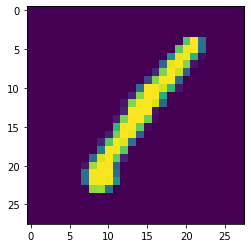

In [5]:
plt.imshow(x_train[0].reshape(28,28))

In [173]:
model = tf.keras.Sequential([
    layers.Dense(150, activation="relu", input_dim=784),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [174]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])

In [175]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 2.1423 - accuracy: 0.8671
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.4165 - accuracy: 0.9256
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2473 - accuracy: 0.9407
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1883 - accuracy: 0.9509
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1571 - accuracy: 0.9566
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1385 - accuracy: 0.9606
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1254 - accuracy: 0.9643
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1036 - accuracy: 0.9697
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1015 - accuracy: 0.9705
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.093

In [176]:
test_data = pandas.read_csv("test.csv")

x_test = test_data.values

print(x_test[0].shape)

(784,)


Prediction:  7


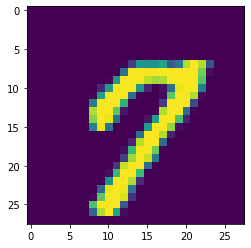

In [194]:
random_index = random.randint(0, test_data.shape[0]-1)

print("Prediction: ", np.argmax(model.predict(np.array([x_test[random_index]]))))
plt.imshow(x_test[random_index].reshape(28,28))

In [178]:
predictions = np.argmax(model.predict(x_test), axis=1)

In [179]:
df = pandas.DataFrame(data=predictions)
df.index.name = "ImageId"
df.index += 1
df.to_csv("test_predictions.csv", header=["Label"], index=True)

96% Accuracy! Not bad.

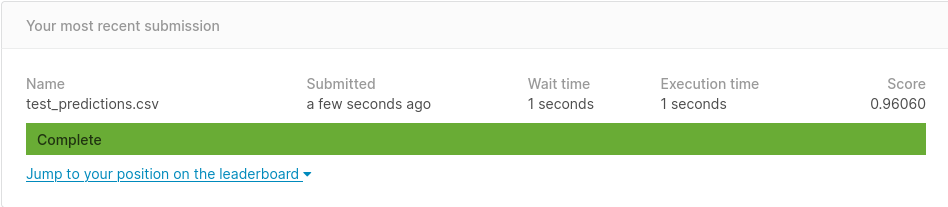